In [1]:
! pip install lightgbm
! pip install eli5
! pip install pdpbox
! pip install scikit-learn
! pip install scikit-plot


In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.metrics import roc_auc_score,confusion_matrix,make_scorer,classification_report,roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE, RandomOverSampler
from imblearn.under_sampling import ClusterCentroids,NearMiss, RandomUnderSampler
import lightgbm as lgb
import eli5
from eli5.sklearn import PermutationImportance
from sklearn import tree
import graphviz
from pdpbox import pdp,info_plots
import scikitplot as skplt
from scikitplot.metrics import plot_confusion_matrix,plot_precision_recall_curve



from scipy.stats import randint as sp_randint
import warnings
warnings.filterwarnings('ignore')






In [3]:
#importing the train dataset
train_df=pd.read_csv('train(1).csv',sep = ',')
train_df.head()

ID_code  target    var_0   var_1    var_2   var_3    var_4   var_5   var_6  \
0  train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607 -9.2834  5.1187   
1  train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622  7.0433  5.6208   
2  train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825 -9.0837  6.9427   
3  train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846 -1.8361  5.8428   
4  train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772  2.4486  5.9405   

     var_7  ...  var_190  var_191  var_192  var_193  var_194  var_195  \
0  18.6266  ...   4.4354   3.9642   3.1364   1.6910  18.5227  -2.3978   
1  16.5338  ...   7.6421   7.7214   2.5837  10.9516  15.4305   2.0339   
2  14.6155  ...   2.9057   9.7905   1.6704   1.6858  21.6042   3.1417   
3  14.9250  ...   4.4666   4.7433   0.7178   1.4214  23.0347  -1.2706   
4  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942  13.2876  -1.5121   

   var_196  var_197  var_198  var_199  
0   7.8784   8.5635  12.7803  -1.0914  
1   8.1267   8.7889  18.3560   1.9518  
2  -6.5213   8.2675  14.7222   0.3965  
3  -2.9275  10.2922  17.9697  -8.9996  
4   3.9267   9.5031  17.9974  -8.8104  

[5 rows x 202 columns]

In [4]:
train_df

ID_code  target    var_0   var_1    var_2   var_3    var_4  \
0            train_0       0   8.9255 -6.7863  11.9081  5.0930  11.4607   
1            train_1       0  11.5006 -4.1473  13.8588  5.3890  12.3622   
2            train_2       0   8.6093 -2.7457  12.0805  7.8928  10.5825   
3            train_3       0  11.0604 -2.1518   8.9522  7.1957  12.5846   
4            train_4       0   9.8369 -1.4834  12.8746  6.6375  12.2772   
...              ...     ...      ...     ...      ...     ...      ...   
199995  train_199995       0  11.4880 -0.4956   8.2622  3.5142  10.3404   
199996  train_199996       0   4.9149 -2.4484  16.7052  6.6345   8.3096   
199997  train_199997       0  11.2232 -5.0518  10.5127  5.6456   9.3410   
199998  train_199998       0   9.7148 -8.6098  13.6104  5.7930  12.5173   
199999  train_199999       0  10.8762 -5.7105  12.1183  8.0328  11.5577   

          var_5   var_6    var_7  ...  var_190  var_191  var_192  var_193  \
0       -9.2834  5.1187  18.6266  ...   4.4354   3.9642   3.1364   1.6910   
1        7.0433  5.6208  16.5338  ...   7.6421   7.7214   2.5837  10.9516   
2       -9.0837  6.9427  14.6155  ...   2.9057   9.7905   1.6704   1.6858   
3       -1.8361  5.8428  14.9250  ...   4.4666   4.7433   0.7178   1.4214   
4        2.4486  5.9405  19.2514  ...  -1.4905   9.5214  -0.1508   9.1942   
...         ...     ...      ...  ...      ...      ...      ...      ...   
199995  11.6081  5.6709  15.1516  ...   6.1415  13.2305   3.9901   0.9388   
199996 -10.5628  5.8802  21.5940  ...   4.9611   4.6549   0.6998   1.8341   
199997  -5.4086  4.5555  21.5571  ...   4.0651   5.4414   3.1032   4.8793   
199998   0.5339  6.0479  17.0152  ...   2.6840   8.6587   2.7337  11.1178   
199999   0.3488  5.2839  15.2058  ...   8.9842   1.6893   0.1276   0.3766   

        var_194  var_195  var_196  var_197  var_198  var_199  
0       18.5227  -2.3978   7.8784   8.5635  12.7803  -1.0914  
1       15.4305   2.0339   8.1267   8.7889  18.3560   1.9518  
2       21.6042   3.1417  -6.5213   8.2675  14.7222   0.3965  
3       23.0347  -1.2706  -2.9275  10.2922  17.9697  -8.9996  
4       13.2876  -1.5121   3.9267   9.5031  17.9974  -8.8104  
...         ...      ...      ...      ...      ...      ...  
199995  18.0249  -1.7939   2.1661   8.5326  16.6660 -17.8661  
199996  22.2717   1.7337  -2.1651   6.7419  15.9054   0.3388  
199997  23.5311  -1.5736   1.2832   8.7155  13.8329   4.1995  
199998  20.4158  -0.0786   6.7980  10.0342  15.5289 -13.9001  
199999  15.2101  -2.4907  -2.2342   8.1857  12.1284   0.1385  

[200000 rows x 202 columns]

In [5]:
train_df.describe()

target          var_0          var_1          var_2  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        0.100490      10.679914      -1.627622      10.715192   
std         0.300653       3.040051       4.050044       2.640894   
min         0.000000       0.408400     -15.043400       2.117100   
25%         0.000000       8.453850      -4.740025       8.722475   
50%         0.000000      10.524750      -1.608050      10.580000   
75%         0.000000      12.758200       1.358625      12.516700   
max         1.000000      20.315000      10.376800      19.353000   

               var_3          var_4          var_5          var_6  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        6.796529      11.078333      -5.065317       5.408949   
std         2.043319       1.623150       7.863267       0.866607   
min        -0.040200       5.074800     -32.562600       2.347300   
25%         5.254075       9.883175     -11.200350       4.767700   
50%         6.825000      11.108250      -4.833150       5.385100   
75%         8.324100      12.261125       0.924800       6.003000   
max        13.188300      16.671400      17.251600       8.447700   

               var_7          var_8  ...        var_190        var_191  \
count  200000.000000  200000.000000  ...  200000.000000  200000.000000   
mean       16.545850       0.284162  ...       3.234440       7.438408   
std         3.418076       3.332634  ...       4.559922       3.023272   
min         5.349700     -10.505500  ...     -14.093300      -2.691700   
25%        13.943800      -2.317800  ...      -0.058825       5.157400   
50%        16.456800       0.393700  ...       3.203600       7.347750   
75%        19.102900       2.937900  ...       6.406200       9.512525   
max        27.691800      10.151300  ...      18.440900      16.716500   

             var_192        var_193        var_194        var_195  \
count  200000.000000  200000.000000  200000.000000  200000.000000   
mean        1.927839       3.331774      17.993784      -0.142088   
std         1.478423       3.992030       3.135162       1.429372   
min        -3.814500     -11.783400       8.694400      -5.261000   
25%         0.889775       0.584600      15.629800      -1.170700   
50%         1.901300       3.396350      17.957950      -0.172700   
75%         2.949500       6.205800      20.396525       0.829600   
max         8.402400      18.281800      27.928800       4.272900   

             var_196        var_197        var_198        var_199  
count  200000.000000  200000.000000  200000.000000  200000.000000  
mean        2.303335       8.908158      15.870720      -3.326537  
std         5.454369       0.921625       3.010945      10.438015  
min       -14.209600       5.960600       6.299300     -38.852800  
25%        -1.946925       8.252800      13.829700     -11.208475  
50%         2.408900       8.888200      15.934050      -2.819550  
75%         6.556725       9.593300      18.064725       4.836800  
max        18.321500      12.000400      26.079100      28.500700  

[8 rows x 201 columns]

In [6]:
train_df.shape

(200000, 202)

In [7]:
train_df.isnull().sum()

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

Count of target classes :
 target
0    179902
1     20098
Name: count, dtype: int64
percentage of count of target classes :
 target
0    89.951
1    10.049
Name: count, dtype: float64
CPU times: total: 2.83 s
Wall time: 2.51 s


Text(0, 0.5, 'Index')

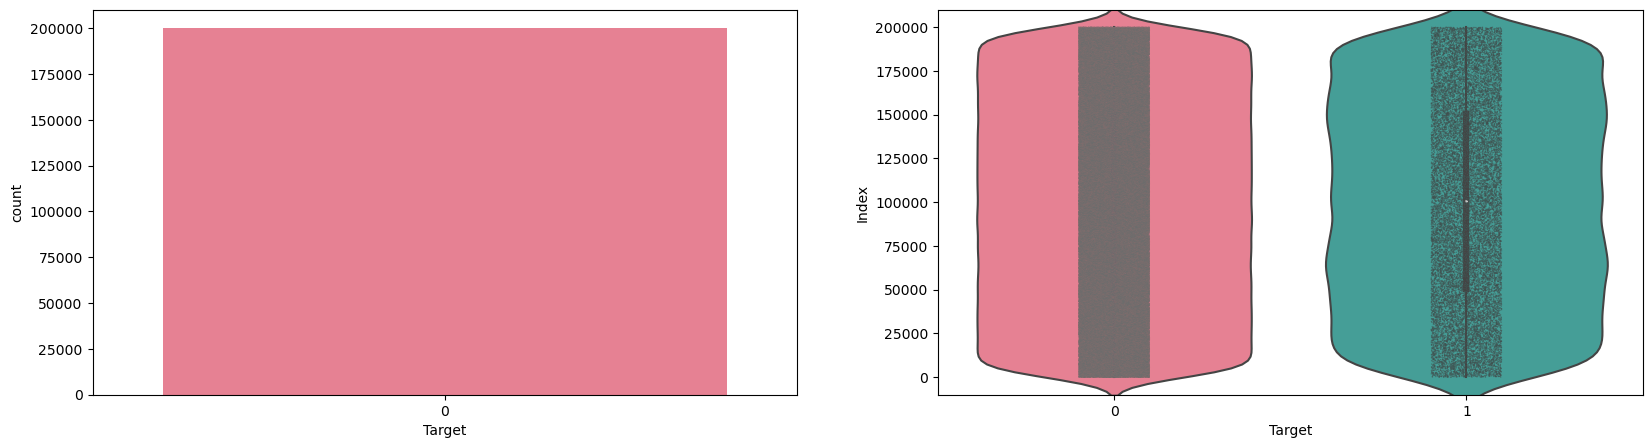

In [8]:
%%time
#target classes count
target_class=train_df['target'].value_counts()
print('Count of target classes :\n',target_class)
#Percentage of target classes count
per_target_class=train_df['target'].value_counts()/len(train_df)*100
print('percentage of count of target classes :\n',per_target_class)

#Countplot and violin plot for target classes
fig,ax=plt.subplots(1,2,figsize=(20,5))
sns.countplot(train_df.target.values,ax=ax[0],palette='husl')
sns.violinplot(x=train_df.target.values,y=train_df.index.values,ax=ax[1],palette='husl')
sns.stripplot(x=train_df.target.values,y=train_df.index.values,jitter=True,color='black',linewidth=0.5,size=0.5,alpha=0.5,ax=ax[1],palette='husl')
ax[0].set_xlabel('Target')
ax[1].set_xlabel('Target')
ax[1].set_ylabel('Index')

Take aways:

We have a unbalanced data,where 90% of the data is the number of customers those will not make a transaction and 10% of the data is those who will make a transaction.
Look at the violin plots seems that there are no relationship between the target with the index of the train dataframe.This is more dominated by the zero targets then for the ones.
Look at the jitter plots with violin plots. We can observed that targets looks uniformly distributed over the indexs of the dataframe.

#### Let us look distribution of train attributes

In [9]:
%%time
#Distribution of train attributes
def plot_train_attribute_distribution(t0,t1,label1,label2,train_attributes):
    i=0
    sns.set_style('whitegrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in train_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(t0[attribute],hist=False,label=label1)
        sns.distplot(t1[attribute],hist=False,label=label2)
        plt.legend()
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

CPU times: total: 0 ns
Wall time: 0 ns


#### Let us see first 100 train attributes will be displayed in next cell.

<Figure size 640x480 with 0 Axes>

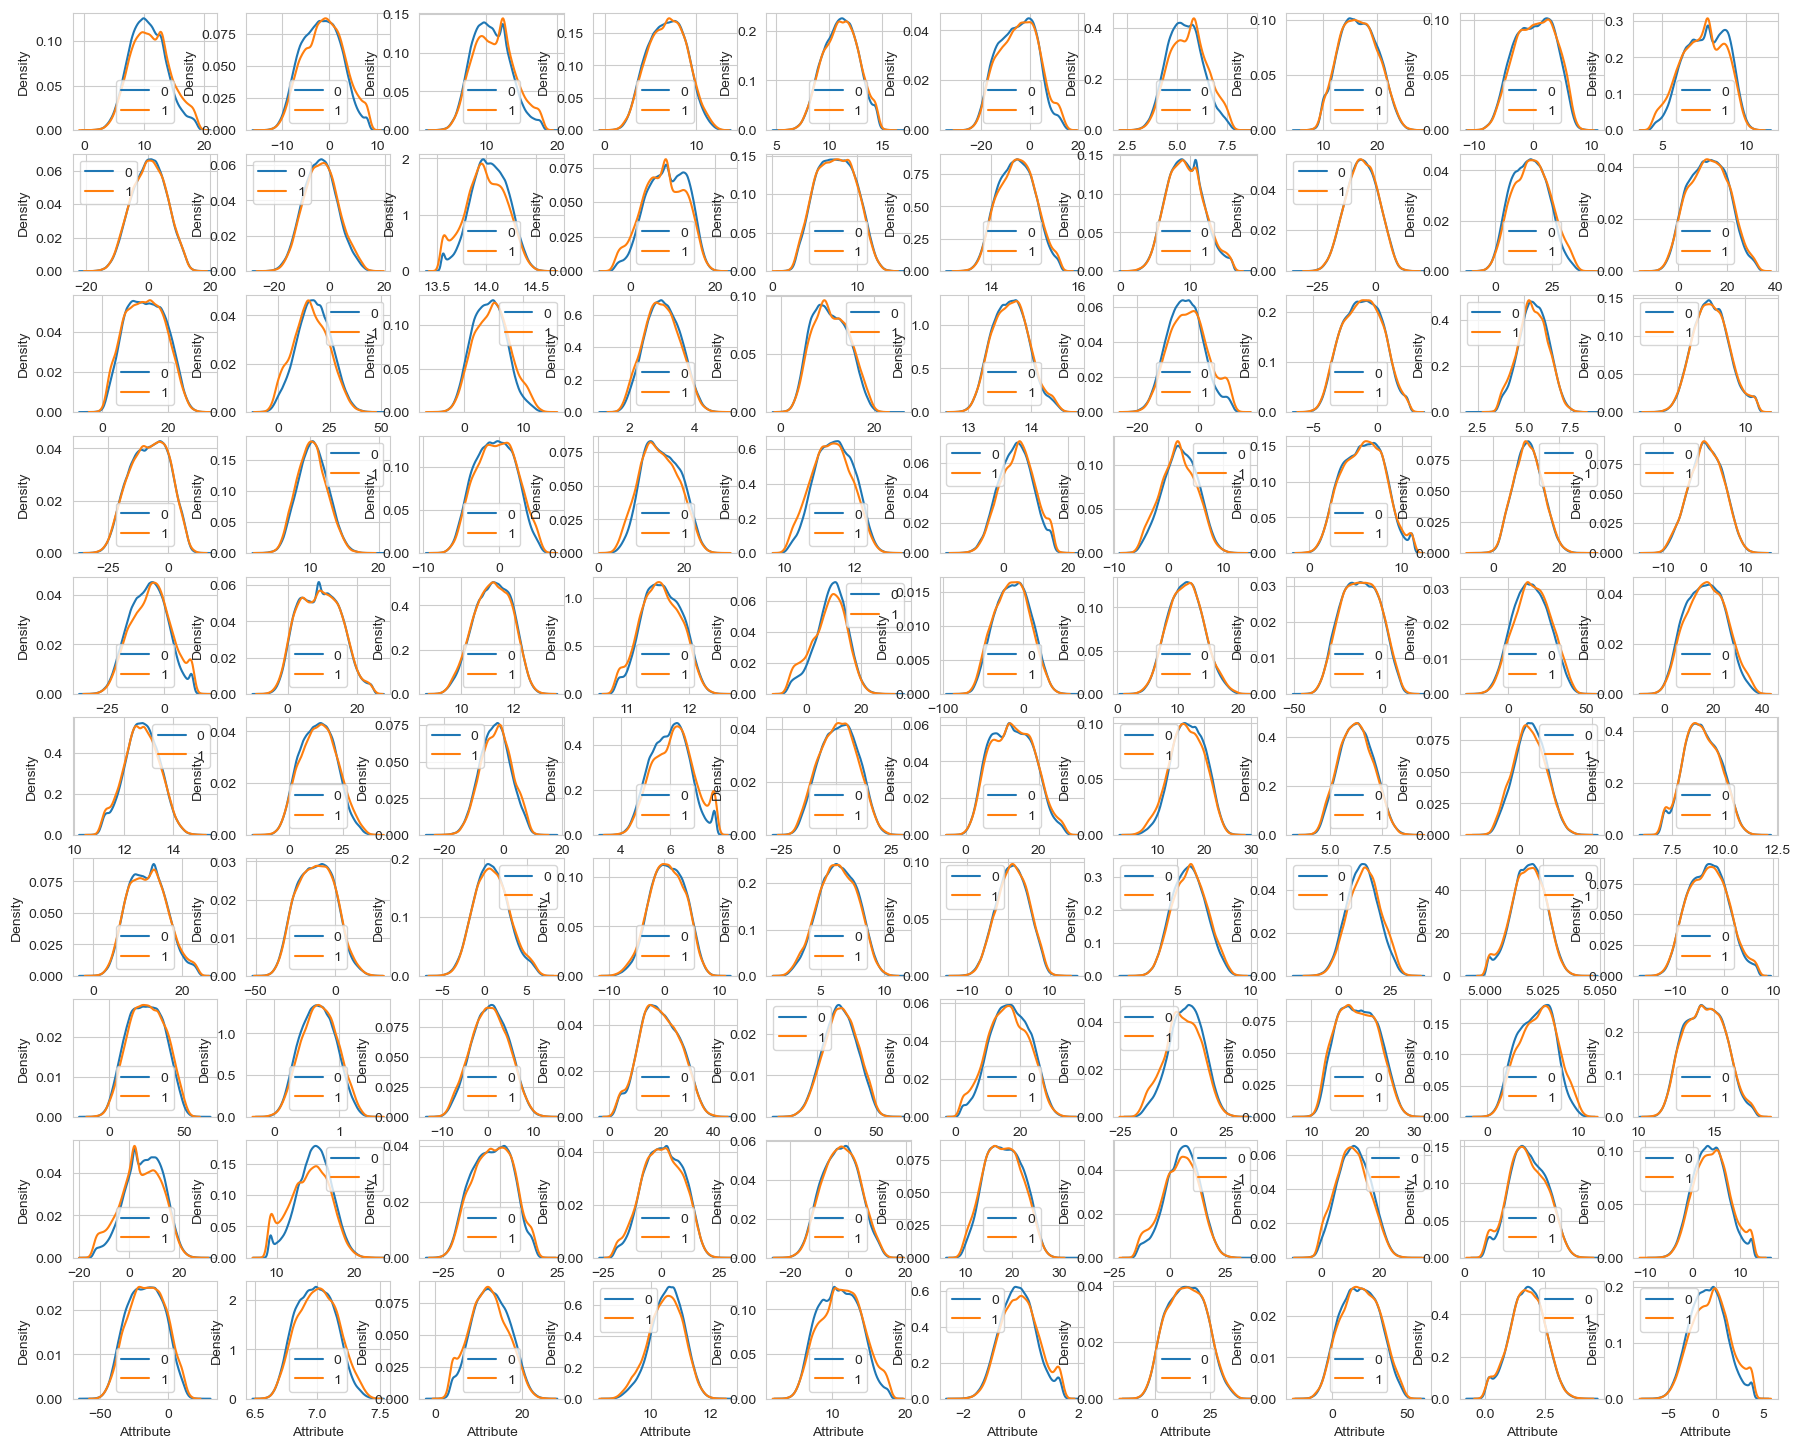

CPU times: total: 4min 4s
Wall time: 3min 28s


In [10]:
%%time
#corresponding to negative class
t0=train_df[train_df.target.values==0]
#corresponding to positive class
t1=train_df[train_df.target.values==1]
#train attributes from 2 to 102
train_attributes=train_df.columns.values[2:102]
#plot distribution of train attributes
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)


#### Let us see next 100 train attributes will be displayed in next cell.

<Figure size 640x480 with 0 Axes>

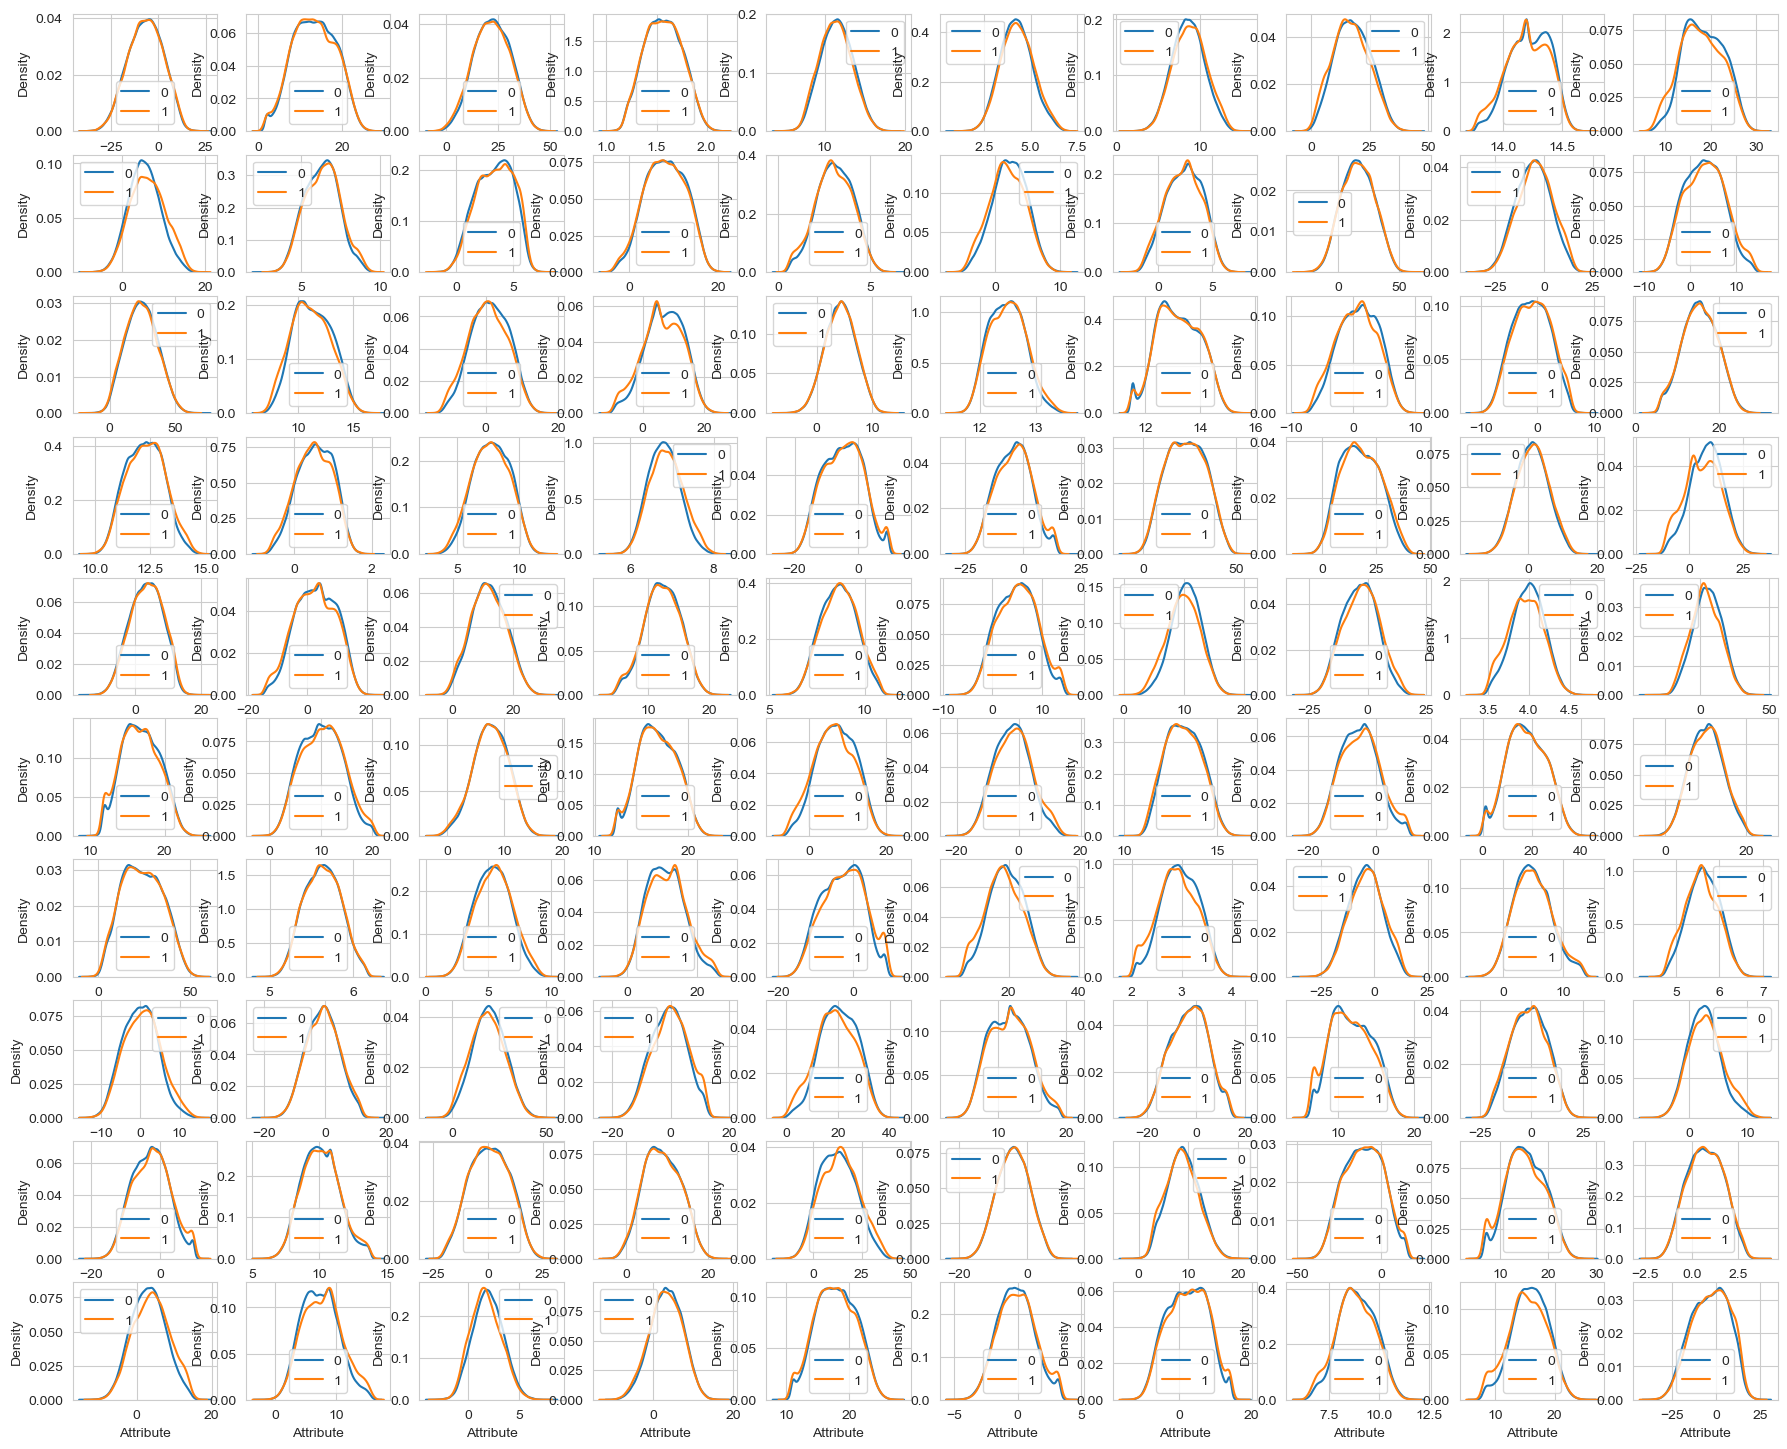

CPU times: total: 4min 4s
Wall time: 3min 28s


In [11]:
%%time
#train attributes from 102 to 203
train_attributes=train_df.columns.values[102:203]
#plot distribution of train attributes
plot_train_attribute_distribution(t0,t1,'0','1',train_attributes)


Take aways:

We can observed that their is a considerable number of features which are significantly have different distributions for two target variables. For example like var_0,var_1,var_9,var_198 var_180 etc.
We can observed that their is a considerable number of features which are significantly have same distributions for two target variables. For example like var_3,var_7,var_10,var_171,var_185 etc.

#### Let us look distribution of test attributes

In [12]:
%%time
#Distribution of test attributes
def plot_test_attribute_distribution(test_attributes):
    i=0
    sns.set_style('whitegrid')
    
    fig=plt.figure()
    ax=plt.subplots(10,10,figsize=(22,18))
    
    for attribute in test_attributes:
        i+=1
        plt.subplot(10,10,i)
        sns.distplot(test_df[attribute],hist=False)
        plt.xlabel('Attribute',)
        sns.set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    plt.show()

CPU times: total: 0 ns
Wall time: 0 ns


In [13]:
test_df=pd.read_csv('train(1).csv')

<Figure size 640x480 with 0 Axes>

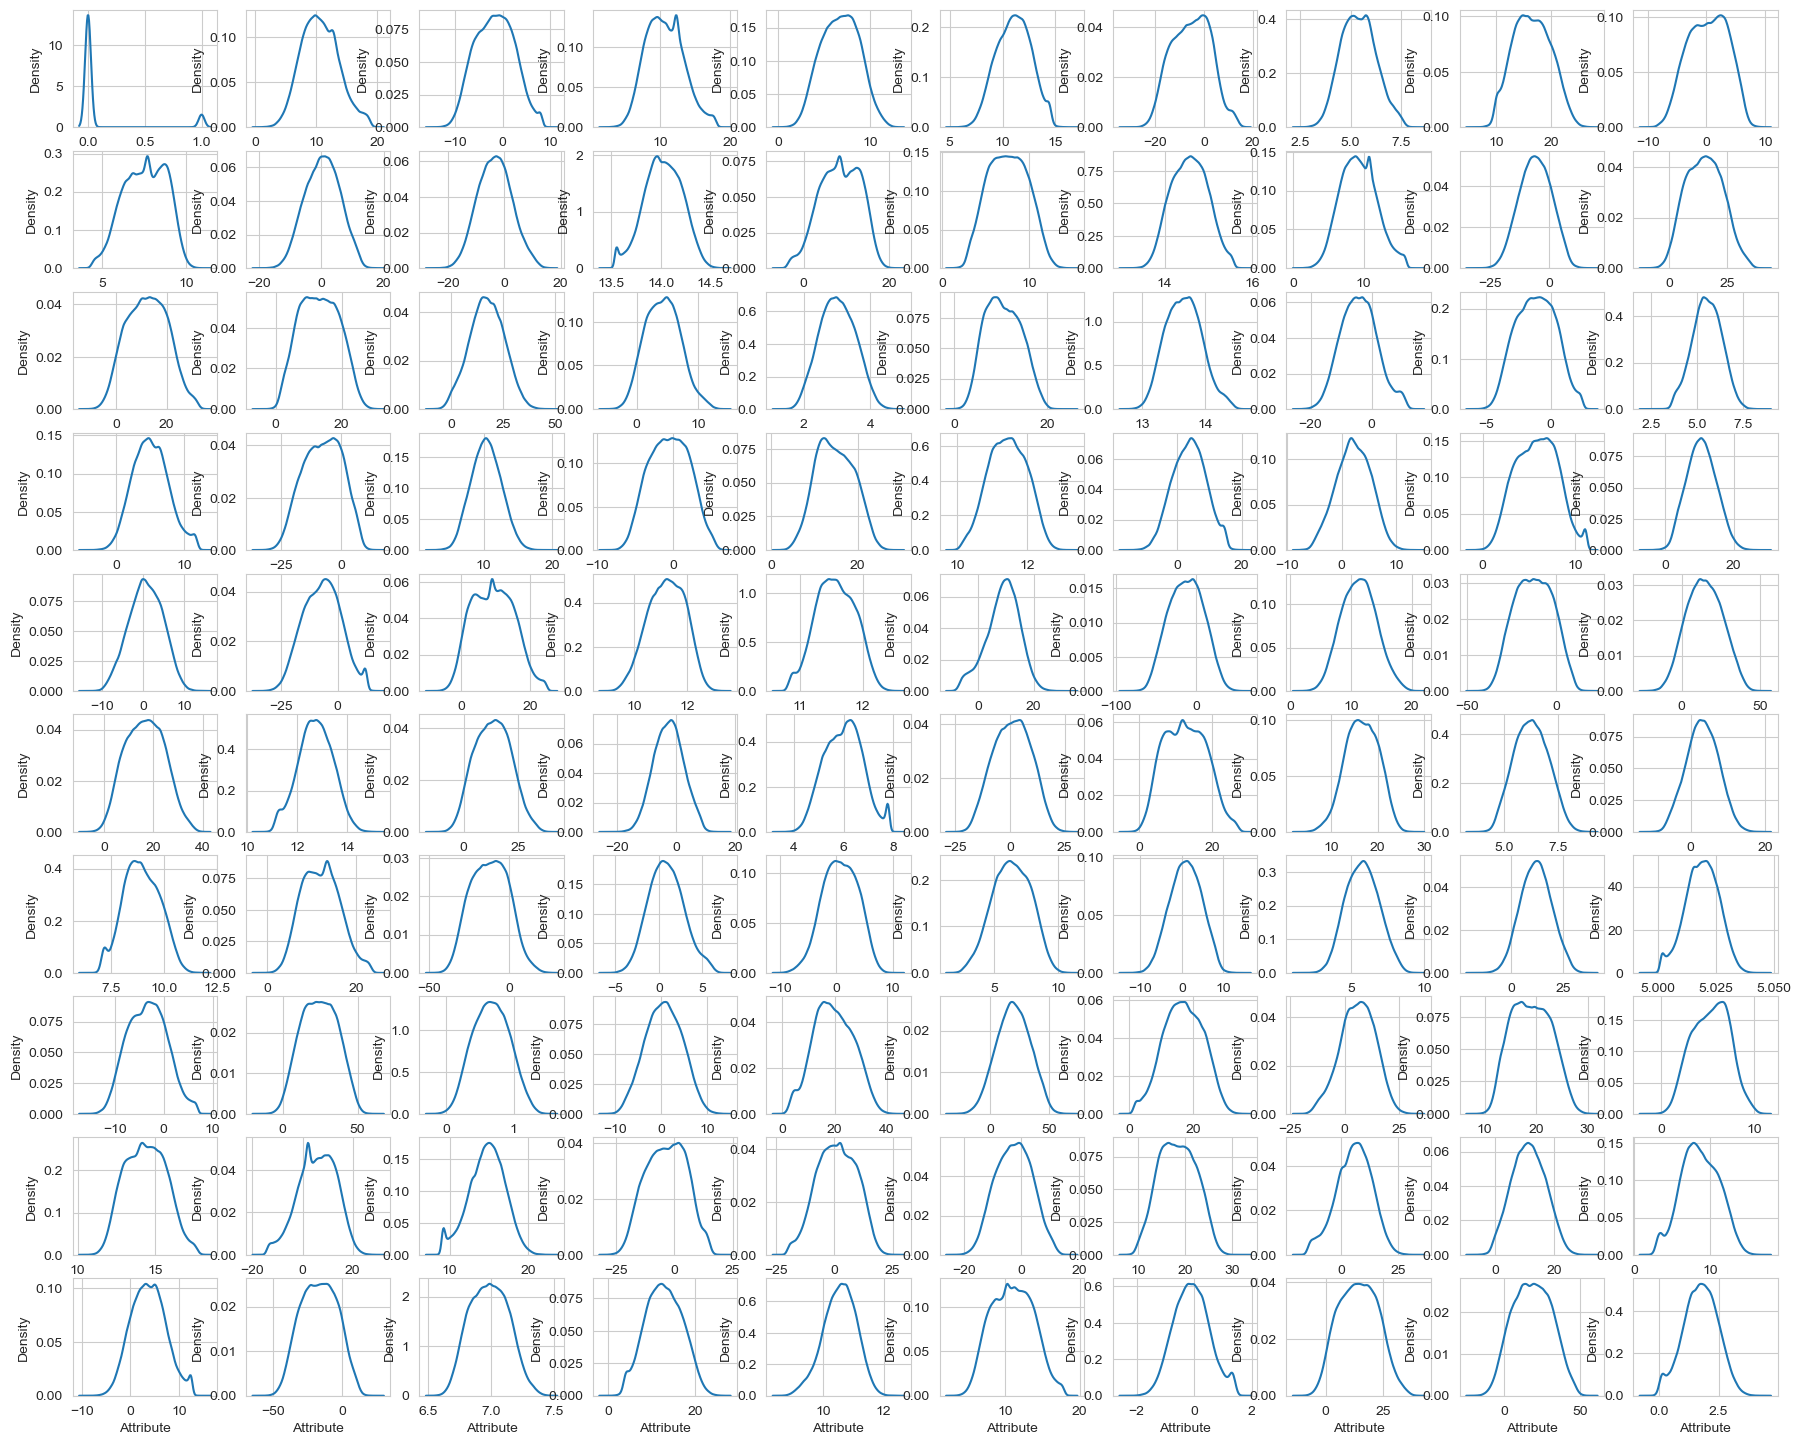

CPU times: total: 3min 41s
Wall time: 3min 26s


In [14]:
%%time
#test attribiutes from 1 to 101
test_attributes=test_df.columns.values[1:101]
#plot distribution of test attributes
plot_test_attribute_distribution(test_attributes)

ValueError: num must be an integer with 1 <= num <= 100, not 101

<Figure size 640x480 with 0 Axes>

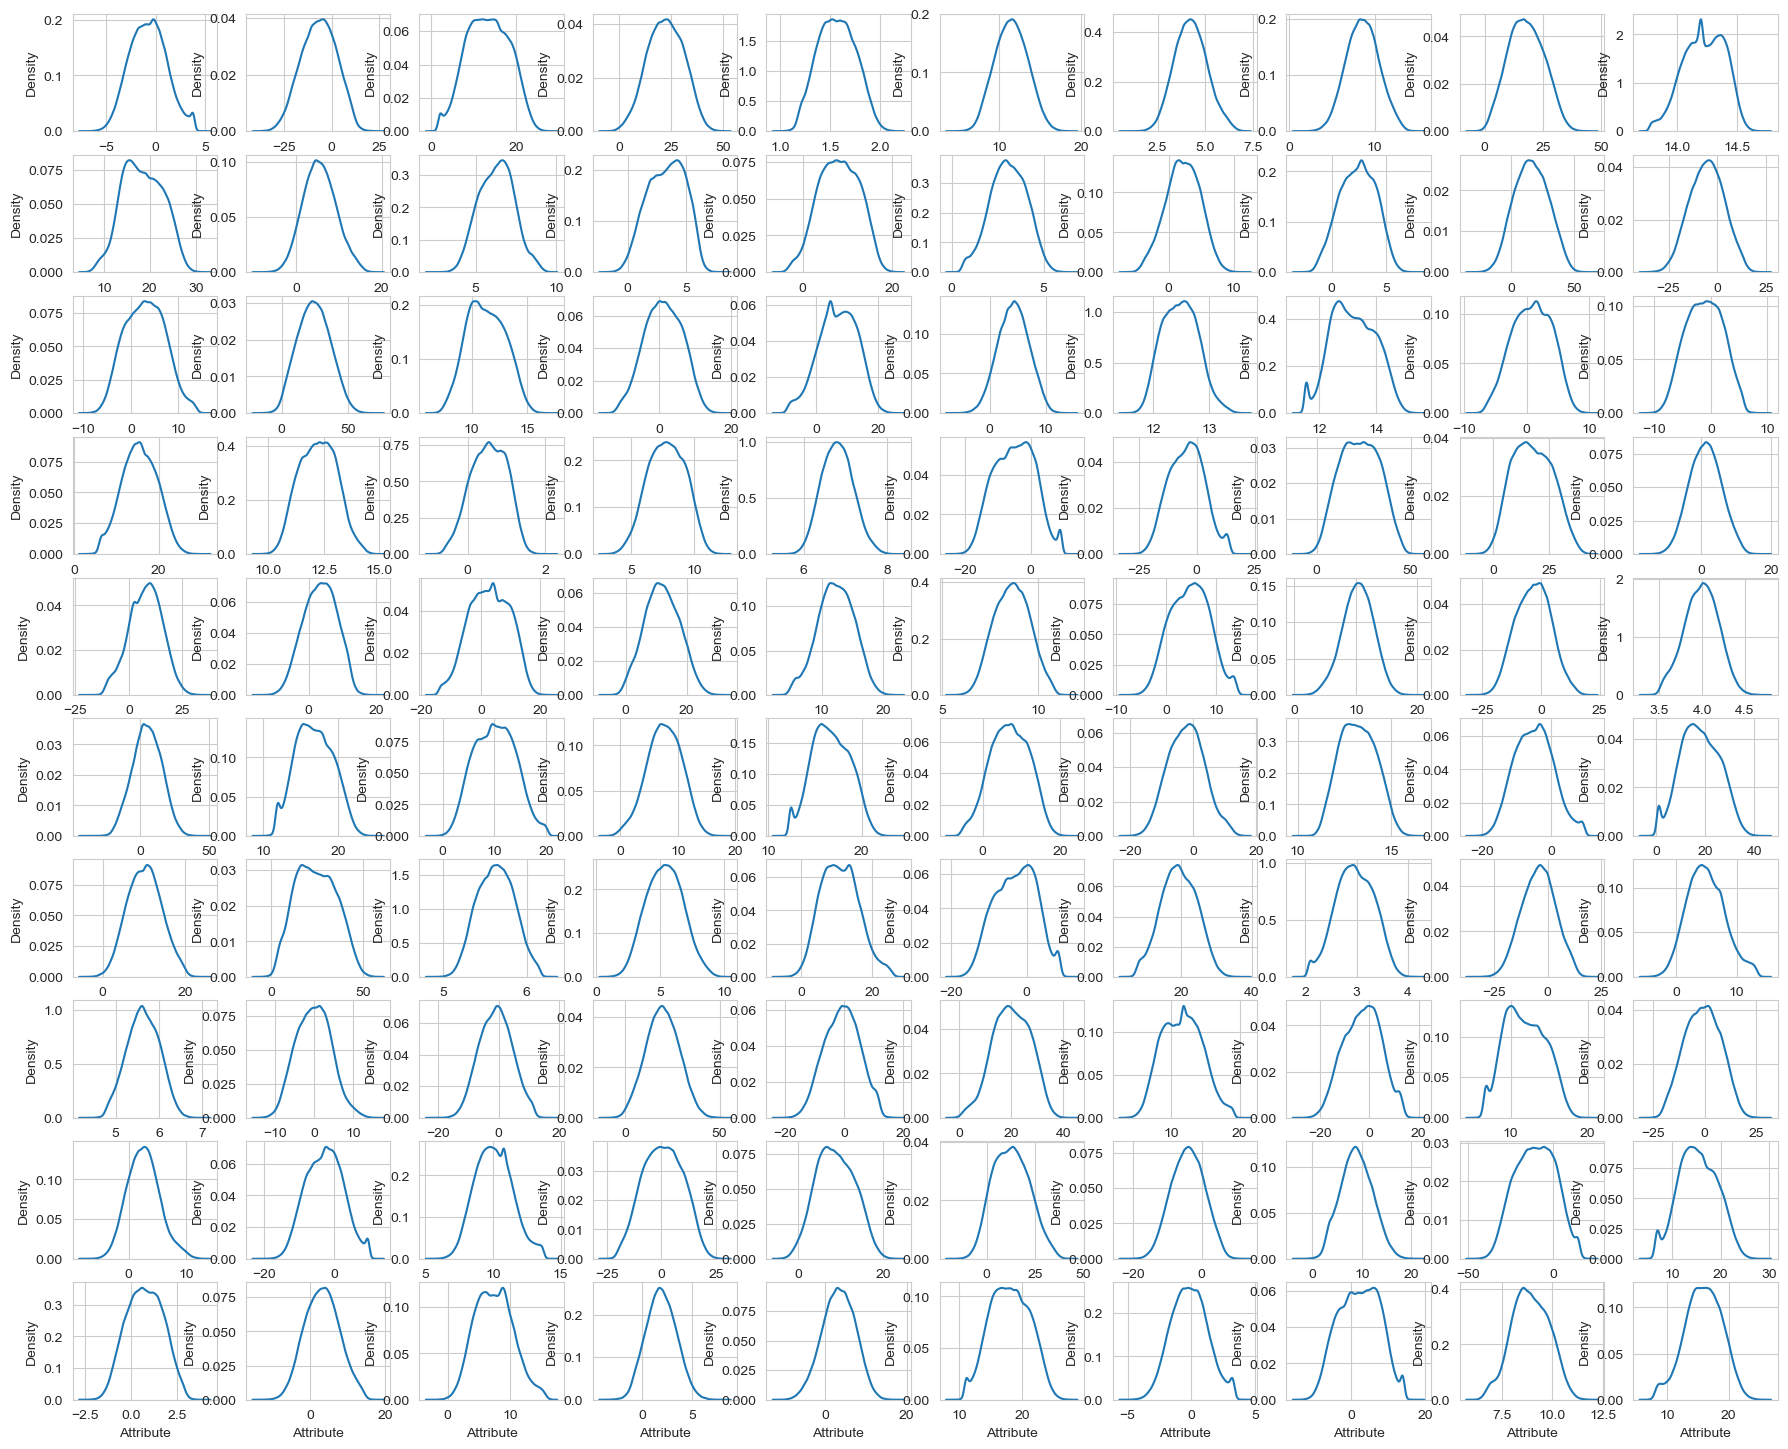

In [27]:
%%time
#test attributes from 101 to 202
test_attributes=test_df.columns.values[101:202]
#plot the distribution of test attributes
plot_test_attribute_distribution(test_attributes)


Take aways:

We can observed that their is a considerable number of features which are significantly have different distributions. For example like var_0,var_1,var_9,var_180 var_198 etc.
We can observed that their is a considerable number of features which are significantly have same distributions. For example like var_3,var_7,var_10,var_171,var_185,var_192 etc

#### let us look distribution of mean values per rows and columns in train and test dataset

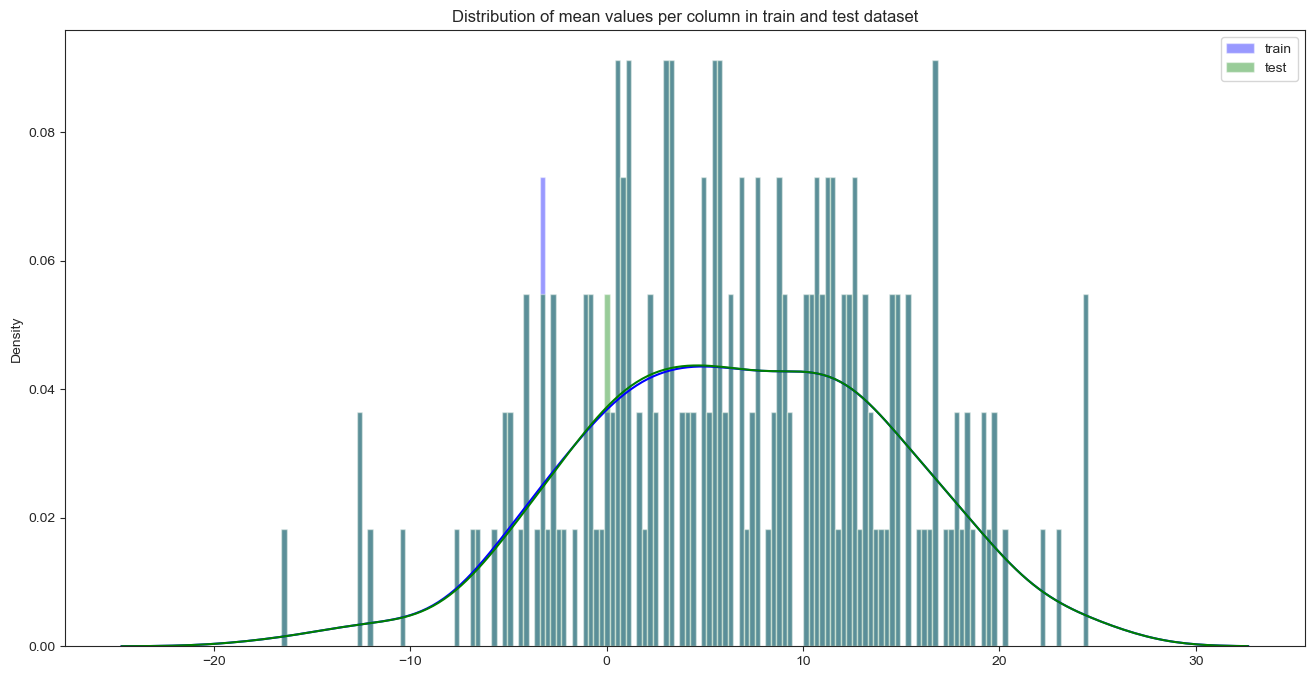

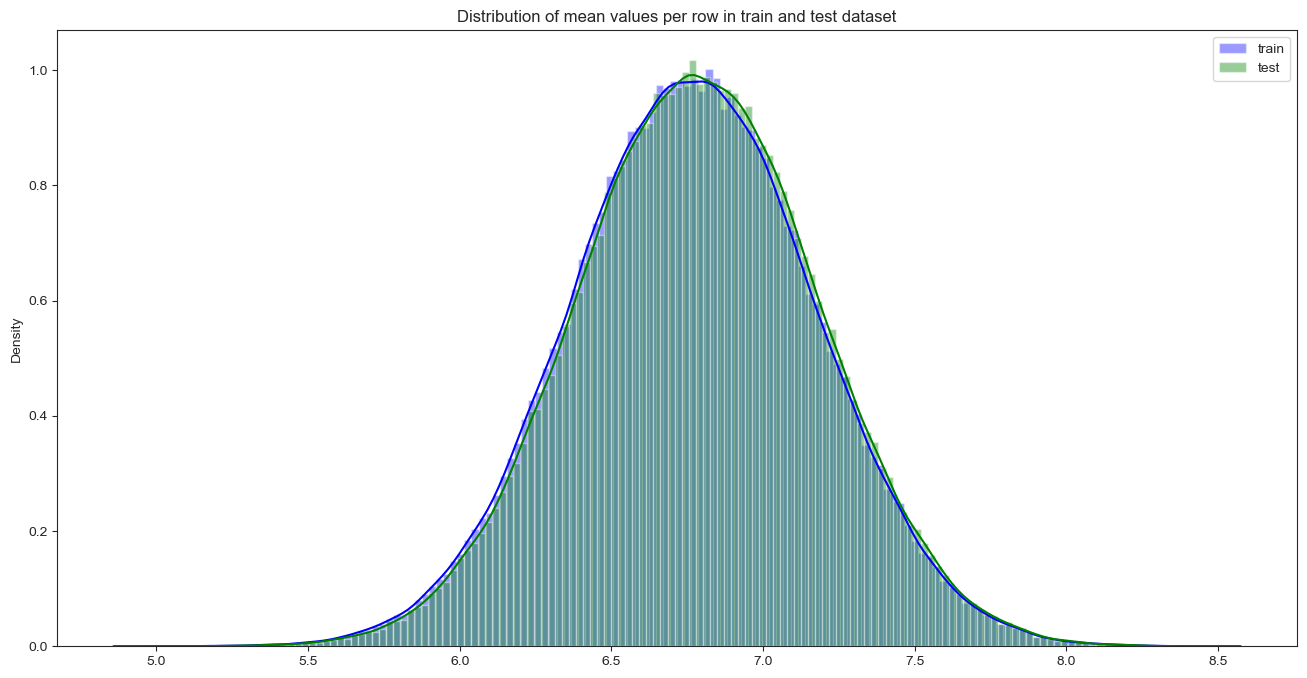

CPU times: total: 10.2 s
Wall time: 10.1 s


In [16]:
%%time
#Distribution of mean values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=train_df.columns.values[2:202]
#test attributes
test_attributes=test_df.columns.values[1:201]
#Distribution plot for mean values per column in train attributes
sns.distplot(train_df[train_attributes].mean(axis=0),color='blue',kde=True,bins=150,label='train')
#Distribution plot for mean values per column in test attributes
sns.distplot(test_df[test_attributes].mean(axis=0),color='green',kde=True,bins=150,label='test')
plt.title('Distribution of mean values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of mean values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for mean values per row in train attributes
sns.distplot(train_df[train_attributes].mean(axis=1),color='blue',kde=True,bins=150,label='train')
#Distribution plot for mean values per row in test attributes
sns.distplot(test_df[test_attributes].mean(axis=1),color='green',kde=True, bins=150, label='test')
plt.title('Distribution of mean values per row in train and test dataset')
plt.legend()
plt.show()

#### Let us look distribution of standard deviation(std) values per rows and columns in train and test dataset

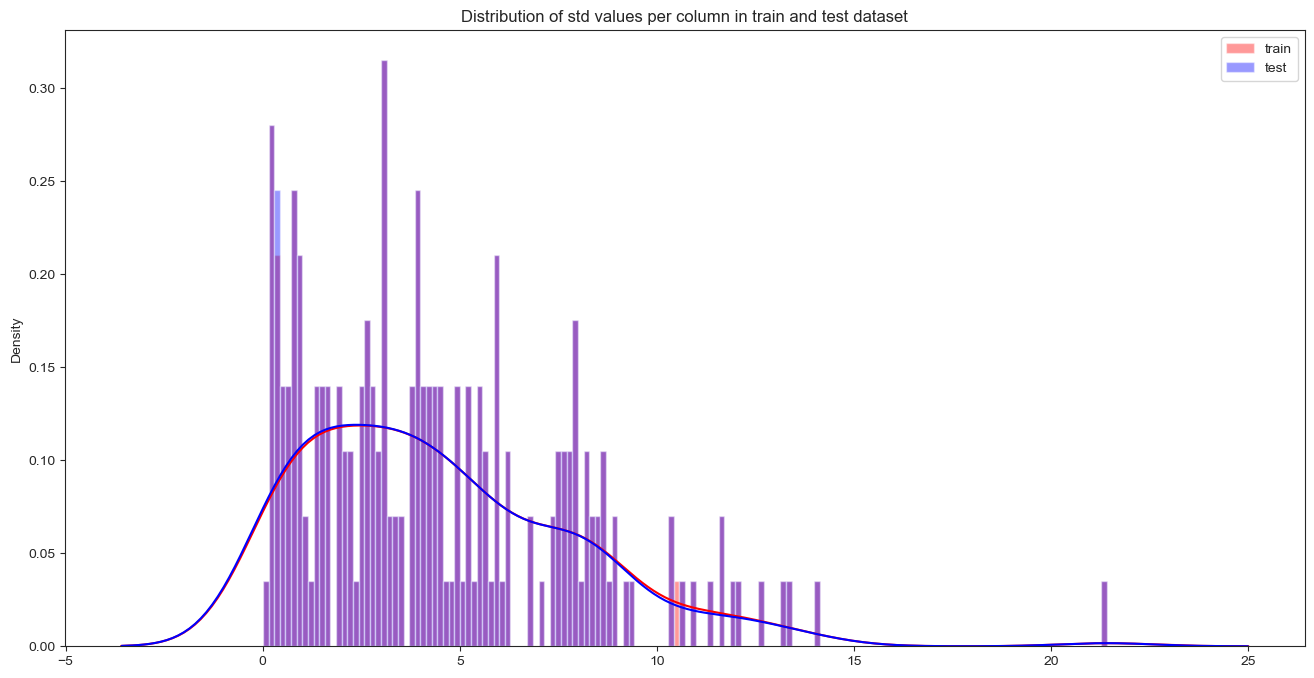

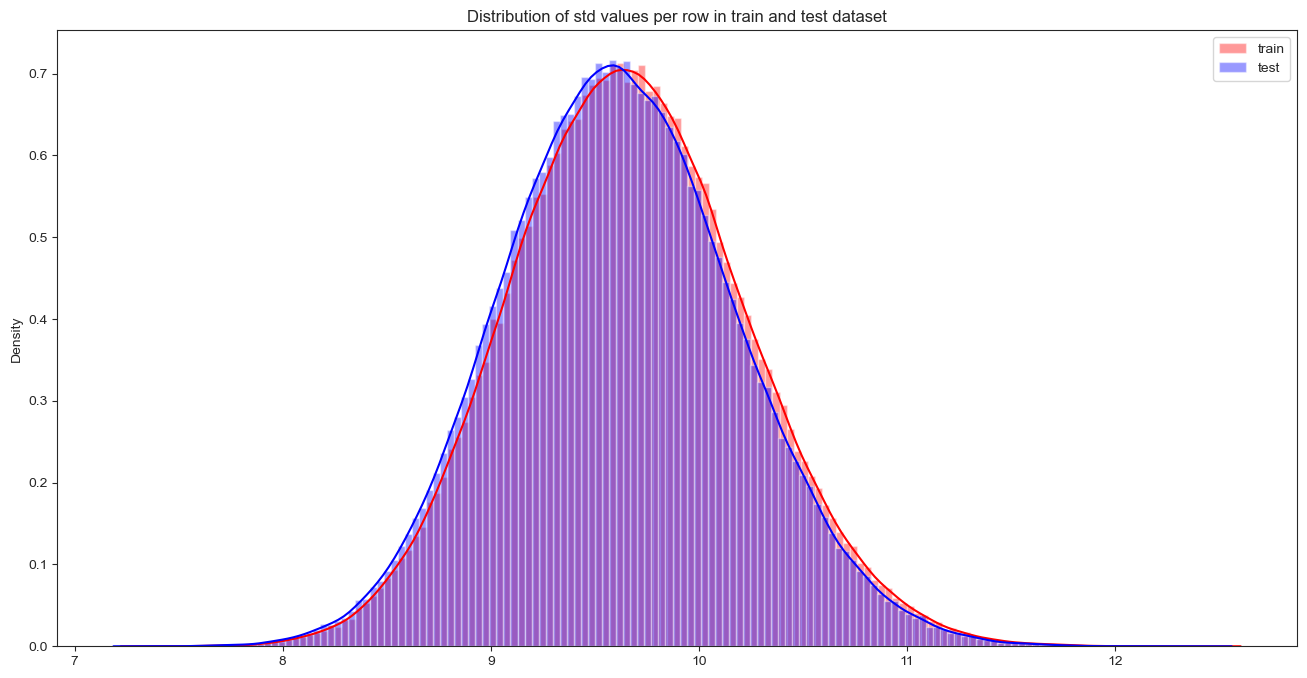

CPU times: total: 9.52 s
Wall time: 9.01 s


In [17]:
%%time
#Distribution of std values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=train_df.columns.values[2:202]
#test attributes
test_attributes=test_df.columns.values[1:201]
#Distribution plot for std values per column in train attributes
sns.distplot(train_df[train_attributes].std(axis=0),color='red',kde=True,bins=150,label='train')
#Distribution plot for std values per column in test attributes
sns.distplot(test_df[test_attributes].std(axis=0),color='blue',kde=True,bins=150,label='test')
plt.title('Distribution of std values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of std values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for std values per row in train attributes
sns.distplot(train_df[train_attributes].std(axis=1),color='red',kde=True,bins=150,label='train')
#Distribution plot for std values per row in test attributes
sns.distplot(test_df[test_attributes].std(axis=1),color='blue',kde=True, bins=150, label='test')
plt.title('Distribution of std values per row in train and test dataset')
plt.legend()
plt.show()


#### Let us look distribution of skewness per rows and columns in train and test dataset

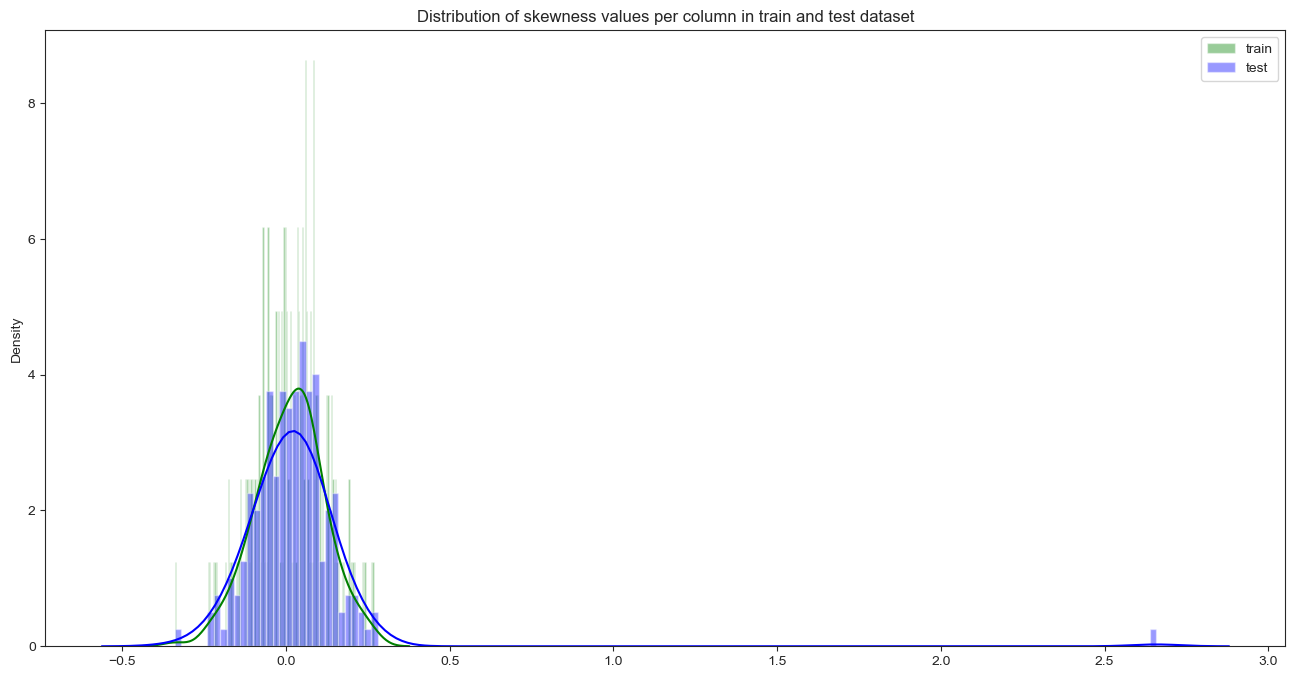

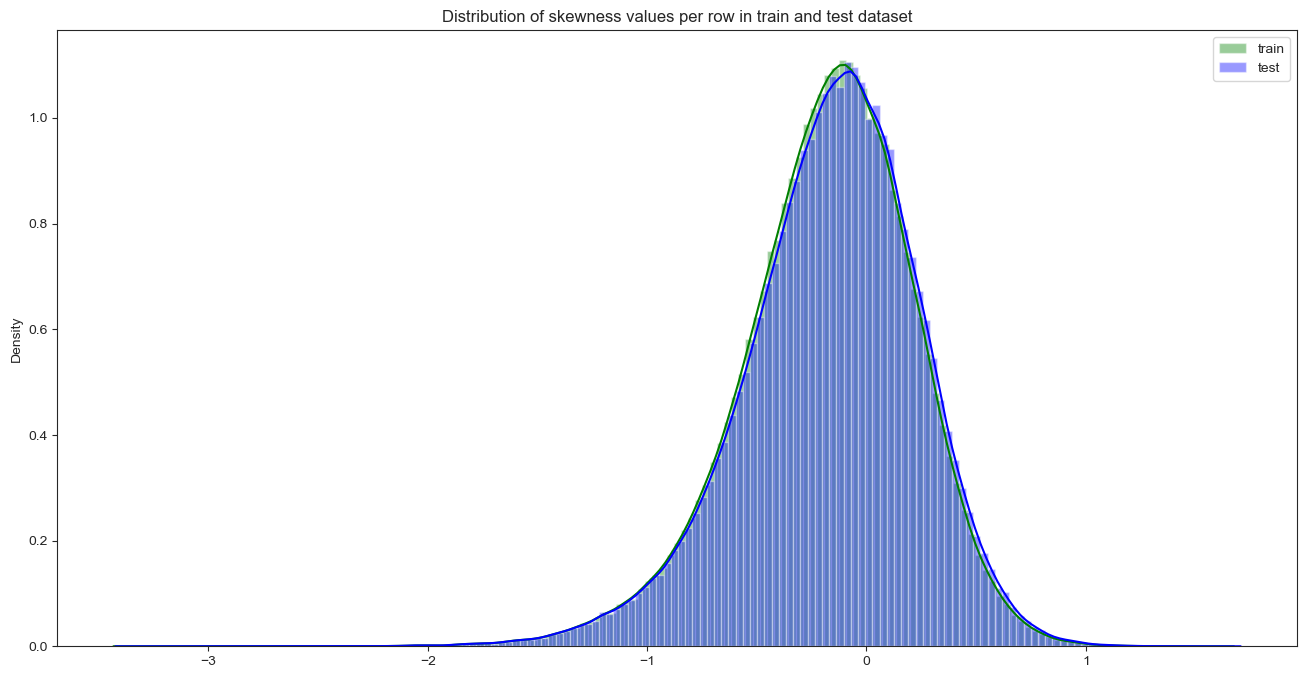

CPU times: total: 16.5 s
Wall time: 18.3 s


In [18]:
%%time
#Distribution of skew values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=train_df.columns.values[2:202]
#test attributes
test_attributes=test_df.columns.values[1:201]
#Distribution plot for skew values per column in train attributes
sns.distplot(train_df[train_attributes].skew(axis=0),color='green',kde=True,bins=150,label='train')
#Distribution plot for skew values per column in test attributes
sns.distplot(test_df[test_attributes].skew(axis=0),color='blue',kde=True,bins=150,label='test')
plt.title('Distribution of skewness values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of skew values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for skew values per row in train attributes
sns.distplot(train_df[train_attributes].skew(axis=1),color='green',kde=True,bins=150,label='train')
#Distribution plot for skew values per row in test attributes
sns.distplot(test_df[test_attributes].skew(axis=1),color='blue',kde=True, bins=150, label='test')
plt.title('Distribution of skewness values per row in train and test dataset')
plt.legend()
plt.show()

#### Let us look distribution of kurtosis values per rows and columns in train and test dataset

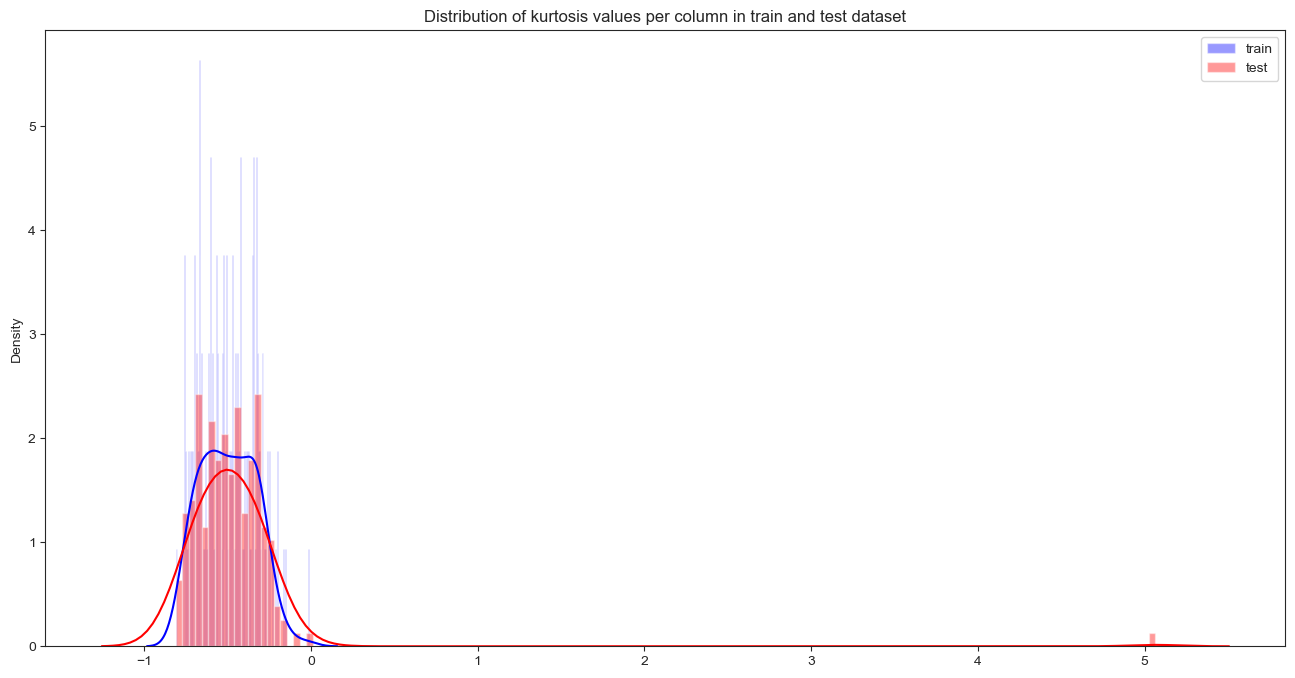

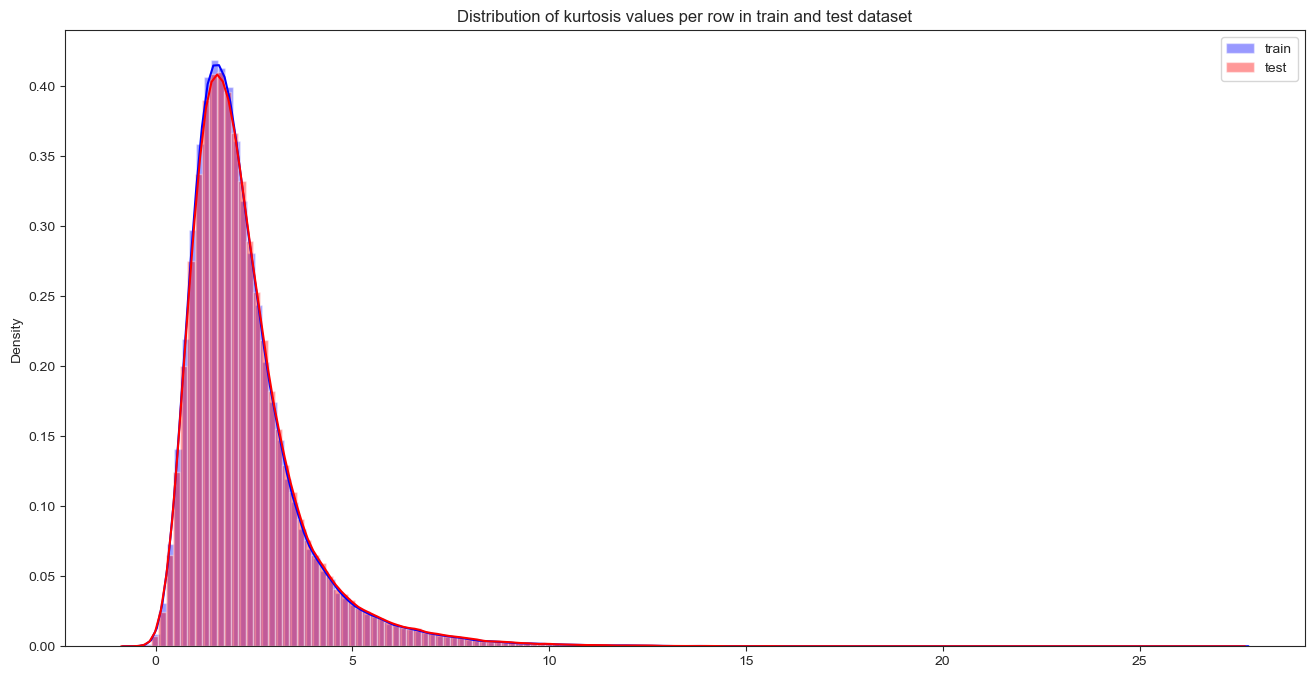

CPU times: total: 15.9 s
Wall time: 17.2 s


In [19]:
%%time
#Distribution of kurtosis values per column in train and test dataset
plt.figure(figsize=(16,8))
#train attributes
train_attributes=train_df.columns.values[2:202]
#test attributes
test_attributes=test_df.columns.values[1:201]
#Distribution plot for kurtosis values per column in train attributes
sns.distplot(train_df[train_attributes].kurtosis(axis=0),color='blue',kde=True,bins=150,label='train')
#Distribution plot for kurtosis values per column in test attributes
sns.distplot(test_df[test_attributes].kurtosis(axis=0),color='red',kde=True,bins=150,label='test')
plt.title('Distribution of kurtosis values per column in train and test dataset')
plt.legend()
plt.show()

#Distribution of kutosis values per row in train and test dataset
plt.figure(figsize=(16,8))
#Distribution plot for kurtosis values per row in train attributes
sns.distplot(train_df[train_attributes].kurtosis(axis=1),color='blue',kde=True,bins=150,label='train')
#Distribution plot for kurtosis values per row in test attributes
sns.distplot(test_df[test_attributes].kurtosis(axis=1),color='red',kde=True, bins=150, label='test')
plt.title('Distribution of kurtosis values per row in train and test dataset')
plt.legend()
plt.show()


### Missing value analysis

In [28]:
%%time
#Finding the missing values in train and test data
train_missing=train_df.isnull().sum().sum()
test_missing=train_df.isnull().sum().sum()
print('Missing values in train data :',train_missing)
print('Missing values in test data :',test_missing)

Missing values in train data : 0
Missing values in test data : 0
CPU times: total: 375 ms
Wall time: 646 ms


No missing values are present in both train and test data.

#### Correlation between the attributes

We can observed that the correlation between the train attributes is very small.

In [29]:
%%time
#Correlations in train attributes
train_attributes=train_df.columns.values[2:202]
train_correlations=train_df[train_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
train_correlations=train_correlations[train_correlations['level_0']!=train_correlations['level_1']]
print(train_correlations.head(10))
print(train_correlations.tail(10))

   level_0  level_1             0
0   var_75  var_191  2.703975e-08
1  var_191   var_75  2.703975e-08
2  var_173    var_6  5.942735e-08
3    var_6  var_173  5.942735e-08
4  var_126  var_109  1.313947e-07
5  var_109  var_126  1.313947e-07
6  var_144   var_27  1.772502e-07
7   var_27  var_144  1.772502e-07
8  var_177  var_100  3.116544e-07
9  var_100  var_177  3.116544e-07
       level_0  level_1         0
39790  var_183  var_189  0.009359
39791  var_189  var_183  0.009359
39792  var_174   var_81  0.009490
39793   var_81  var_174  0.009490
39794   var_81  var_165  0.009714
39795  var_165   var_81  0.009714
39796   var_53  var_148  0.009788
39797  var_148   var_53  0.009788
39798   var_26  var_139  0.009844
39799  var_139   var_26  0.009844
CPU times: total: 38.2 s
Wall time: 40.6 s


We can observed that the correlation between the test attributes is very small.

In [22]:
%%time
#Correlations in test attributes
test_attributes=test_df.columns.values[1:201]
test_correlations=test_df[test_attributes].corr().abs().unstack().sort_values(kind='quicksort').reset_index()
test_correlations=test_correlations[test_correlations['level_0']!=test_correlations['level_1']]
print(test_correlations.head(10))
print(test_correlations.tail(10))

   level_0  level_1             0
0  var_191   var_75  2.703975e-08
1   var_75  var_191  2.703975e-08
2    var_6  var_173  5.942735e-08
3  var_173    var_6  5.942735e-08
4  var_126  var_109  1.313947e-07
5  var_109  var_126  1.313947e-07
6   var_27  var_144  1.772502e-07
7  var_144   var_27  1.772502e-07
8  var_177  var_100  3.116544e-07
9  var_100  var_177  3.116544e-07
       level_0  level_1         0
39790  var_110   target  0.064275
39791   target  var_110  0.064275
39792    var_6   target  0.066731
39793   target    var_6  0.066731
39794   target   var_12  0.069489
39795   var_12   target  0.069489
39796  var_139   target  0.074080
39797   target  var_139  0.074080
39798   var_81   target  0.080917
39799   target   var_81  0.080917
CPU times: total: 37.4 s
Wall time: 44.1 s


#### Correlation plot for train and test data

We can observed from correlation distribution plot that the correlation between the train and test attributes is very very small, it means that features are independent each other.

CPU times: total: 50.5 s
Wall time: 51.2 s


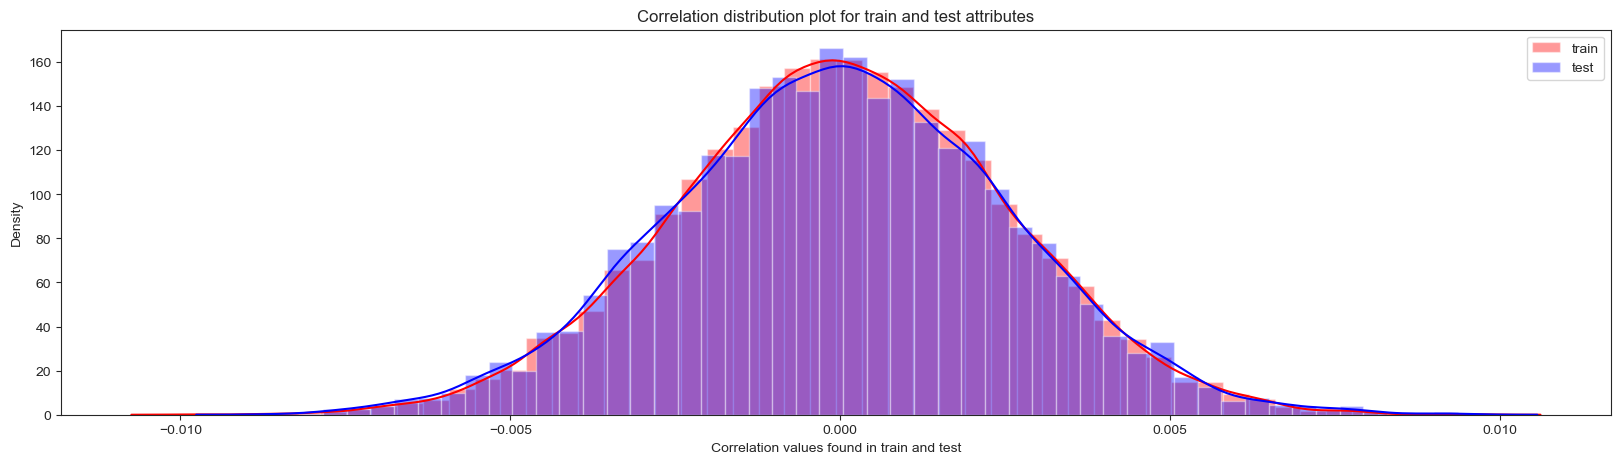

In [30]:
%%time
#Correlations in train data
train_correlations=train_df[train_attributes].corr()
train_correlations=train_correlations.values.flatten()
train_correlations=train_correlations[train_correlations!=1]
#Correlations in test data
test_correlations=test_df[test_attributes].corr()
test_correlations=test_correlations.values.flatten()
test_correlations=test_correlations[test_correlations!=1]

plt.figure(figsize=(20,5))
#Distribution plot for correlations in train data
sns.distplot(train_correlations, color="Red", label="train")
#Distribution plot for correlations in test data
sns.distplot(test_correlations, color="Blue", label="test")
plt.xlabel("Correlation values found in train and test")
plt.ylabel("Density")
plt.title("Correlation distribution plot for train and test attributes")
plt.legend()

#### Feature engineering

Let us do some feature engineering by using

1.Permutation importance
2.Partial dependence plots

#### Permutation importance

Permutation variable importance measure in a random forest for classification and regression.

In [24]:
#training and testing data
X=train_df.drop(columns=['ID_code','target'],axis=1)
test=test_df.drop(columns=['ID_code'],axis=1)
y=train_df['target']

Let us build simple model to find features which are more important.

In [25]:
#Split the training data
X_train,X_valid,y_train,y_valid=train_test_split(X,y,random_state=42)

print('Shape of X_train :',X_train.shape)
print('Shape of X_valid :',X_valid.shape)
print('Shape of y_train :',y_train.shape)
print('Shape of y_valid :',y_valid.shape)

Shape of X_train : (150000, 200)
Shape of X_valid : (50000, 200)
Shape of y_train : (150000,)
Shape of y_valid : (50000,)


### Random forest classifier

In [26]:
%%time
#Random forest classifier
rf_model=RandomForestClassifier(n_estimators=10,random_state=42)
#fitting the model
rf_model.fit(X_train,y_train)

CPU times: total: 3min 12s
Wall time: 3min 29s


RandomForestClassifier(n_estimators=10, random_state=42)

In [ ]:
%%time
#Permutation importance
from eli5.sklearn import PermutationImportance
perm_imp=PermutationImportance(rf_model,random_state=42)
#fitting the model
perm_imp.fit(X_valid,y_valid)